In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df= pd.read_csv('messy_transport_billing_data.csv')
df

,Invoice_ID,Client_Name,Billing_Clerk,Region,Freight_Amount,Billed_Amount,Status,Region_Manager,Date_Processed,Error_Flag
0,INV1000,QuickMove,John D,Calgary,3702.07,3702.07,Pending,Steve,2023-05-22,No
1,INV1001,AB Trucks,Ravi K,Windsor,1955.52,1955.52,Approved,Kathy,2023-01-21,Yes
2,INV1002,GreenLine,John D,Montreal,4311.45,4311.45,Pending,Nora,2023-04-18,No
3,INV1003,QuickMove,Sonia M,Windsor,2216.41,2216.41,Pending,Kathy,2023-05-18,No
4,INV1004,FastShip,Sonia M,Calgary,296.20,296.20,Flagged,Steve,2023-07-07,No
...,...,...,...,...,...,...,...,...,...,...
11995,INV12995,NaN,Sonia M,Montreal,1654.47,1654.47,Flagged,Nora,2023-05-03,No
11996,INV12996,FastShip,Alex P,Toronto,1575.04,1556.04,Flagged,David,2023-03-11,Yes
11997,INV12997,QuickMove,Alex P,Montreal,423.80,423.80,NaN,Nora,2023-08-14,No
11998,INV12998,NaN,Ravi K,Windsor,852.01,852.01,Approved,Kathy,2023-05-17,No


In [2]:
df.isnull().sum()

,0
Invoice_ID,0
Client_Name,357
Billing_Clerk,240
Region,0
Freight_Amount,0
Billed_Amount,0
Status,240
Region_Manager,0
Date_Processed,240
Error_Flag,0


In [3]:
df_cleaned= df


In [4]:
df

,Invoice_ID,Client_Name,Billing_Clerk,Region,Freight_Amount,Billed_Amount,Status,Region_Manager,Date_Processed,Error_Flag
0,INV1000,QuickMove,John D,Calgary,3702.07,3702.07,Pending,Steve,2023-05-22,No
1,INV1001,AB Trucks,Ravi K,Windsor,1955.52,1955.52,Approved,Kathy,2023-01-21,Yes
2,INV1002,GreenLine,John D,Montreal,4311.45,4311.45,Pending,Nora,2023-04-18,No
3,INV1003,QuickMove,Sonia M,Windsor,2216.41,2216.41,Pending,Kathy,2023-05-18,No
4,INV1004,FastShip,Sonia M,Calgary,296.20,296.20,Flagged,Steve,2023-07-07,No
...,...,...,...,...,...,...,...,...,...,...
11995,INV12995,NaN,Sonia M,Montreal,1654.47,1654.47,Flagged,Nora,2023-05-03,No
11996,INV12996,FastShip,Alex P,Toronto,1575.04,1556.04,Flagged,David,2023-03-11,Yes
11997,INV12997,QuickMove,Alex P,Montreal,423.80,423.80,NaN,Nora,2023-08-14,No
11998,INV12998,NaN,Ravi K,Windsor,852.01,852.01,Approved,Kathy,2023-05-17,No


Clean Inconsistent Names
Make sure all client names:

Are in the same case (e.g., title case)
Have no extra spaces or special characters

In [5]:
df_cleaned['Client_Name'] = (
    df_cleaned['Client_Name']
    .astype(str)
    .str.replace(r'[^a-zA-Z\s]', '', regex=True)  # Remove non-alphabetic characters
    .str.strip()  # Remove leading/trailing spaces
    .str.title()  # Capitalize each word
)
df_cleaned


,Invoice_ID,Client_Name,Billing_Clerk,Region,Freight_Amount,Billed_Amount,Status,Region_Manager,Date_Processed,Error_Flag
0,INV1000,Quickmove,John D,Calgary,3702.07,3702.07,Pending,Steve,2023-05-22,No
1,INV1001,Ab Trucks,Ravi K,Windsor,1955.52,1955.52,Approved,Kathy,2023-01-21,Yes
2,INV1002,Greenline,John D,Montreal,4311.45,4311.45,Pending,Nora,2023-04-18,No
3,INV1003,Quickmove,Sonia M,Windsor,2216.41,2216.41,Pending,Kathy,2023-05-18,No
4,INV1004,Fastship,Sonia M,Calgary,296.20,296.20,Flagged,Steve,2023-07-07,No
...,...,...,...,...,...,...,...,...,...,...
11995,INV12995,Nan,Sonia M,Montreal,1654.47,1654.47,Flagged,Nora,2023-05-03,No
11996,INV12996,Fastship,Alex P,Toronto,1575.04,1556.04,Flagged,David,2023-03-11,Yes
11997,INV12997,Quickmove,Alex P,Montreal,423.80,423.80,NaN,Nora,2023-08-14,No
11998,INV12998,Nan,Ravi K,Windsor,852.01,852.01,Approved,Kathy,2023-05-17,No


Use Mode by Client Region

In [6]:
# Replace placeholder with NaN
df_cleaned['Client_Name'] = df_cleaned['Client_Name'].replace('Nan', np.nan)

# Create mapping: most frequent client per region
client_mode_map = (
    df_cleaned
    .dropna(subset=['Client_Name'])
    .groupby('Region')['Client_Name']
    .agg(lambda x: x.mode().iloc[0])
)

# Fill missing client name using region mapping
df_cleaned['Client_Name'] = df_cleaned['Client_Name'].fillna(df_cleaned['Region'].map(client_mode_map))
df_cleaned

,Invoice_ID,Client_Name,Billing_Clerk,Region,Freight_Amount,Billed_Amount,Status,Region_Manager,Date_Processed,Error_Flag
0,INV1000,Quickmove,John D,Calgary,3702.07,3702.07,Pending,Steve,2023-05-22,No
1,INV1001,Ab Trucks,Ravi K,Windsor,1955.52,1955.52,Approved,Kathy,2023-01-21,Yes
2,INV1002,Greenline,John D,Montreal,4311.45,4311.45,Pending,Nora,2023-04-18,No
3,INV1003,Quickmove,Sonia M,Windsor,2216.41,2216.41,Pending,Kathy,2023-05-18,No
4,INV1004,Fastship,Sonia M,Calgary,296.20,296.20,Flagged,Steve,2023-07-07,No
...,...,...,...,...,...,...,...,...,...,...
11995,INV12995,Ab Trucks,Sonia M,Montreal,1654.47,1654.47,Flagged,Nora,2023-05-03,No
11996,INV12996,Fastship,Alex P,Toronto,1575.04,1556.04,Flagged,David,2023-03-11,Yes
11997,INV12997,Quickmove,Alex P,Montreal,423.80,423.80,NaN,Nora,2023-08-14,No
11998,INV12998,Abc Corp,Ravi K,Windsor,852.01,852.01,Approved,Kathy,2023-05-17,No


Used region-wise group-based imputation to fill missing billing clerks, ensuring contextual accuracy instead of global replacement — improving data quality for downstream analysis."

In [7]:
df_cleaned['Billing_Clerk'] = df_cleaned['Billing_Clerk'].replace('Unassigned', np.nan)
clerk_mode_map = (
    df_cleaned
    .dropna(subset=['Billing_Clerk'])
    .groupby('Region')['Billing_Clerk']
    .agg(lambda x: x.mode().iloc[0])
)
df_cleaned['Billing_Clerk'] = df_cleaned['Billing_Clerk'].fillna(df_cleaned['Region'].map(clerk_mode_map))
df_cleaned

,Invoice_ID,Client_Name,Billing_Clerk,Region,Freight_Amount,Billed_Amount,Status,Region_Manager,Date_Processed,Error_Flag
0,INV1000,Quickmove,John D,Calgary,3702.07,3702.07,Pending,Steve,2023-05-22,No
1,INV1001,Ab Trucks,Ravi K,Windsor,1955.52,1955.52,Approved,Kathy,2023-01-21,Yes
2,INV1002,Greenline,John D,Montreal,4311.45,4311.45,Pending,Nora,2023-04-18,No
3,INV1003,Quickmove,Sonia M,Windsor,2216.41,2216.41,Pending,Kathy,2023-05-18,No
4,INV1004,Fastship,Sonia M,Calgary,296.20,296.20,Flagged,Steve,2023-07-07,No
...,...,...,...,...,...,...,...,...,...,...
11995,INV12995,Ab Trucks,Sonia M,Montreal,1654.47,1654.47,Flagged,Nora,2023-05-03,No
11996,INV12996,Fastship,Alex P,Toronto,1575.04,1556.04,Flagged,David,2023-03-11,Yes
11997,INV12997,Quickmove,Alex P,Montreal,423.80,423.80,NaN,Nora,2023-08-14,No
11998,INV12998,Abc Corp,Ravi K,Windsor,852.01,852.01,Approved,Kathy,2023-05-17,No


In [8]:
df_cleaned['Status'].fillna('Pending', inplace=True)

<ipython-input-8-c2a5d44b0eb2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Status'].fillna('Pending', inplace=True)


 Convert Date_Processed to datetime format
 Calculate the median
 Fill NaN values with the median

In [9]:
df_cleaned['Date_Processed'] = pd.to_datetime(df_cleaned['Date_Processed'], errors='coerce')
median_date = df_cleaned['Date_Processed'].median()
df_cleaned['Date_Processed'] = df_cleaned['Date_Processed'].fillna(median_date)


In [10]:
df_cleaned
df_cleaned.isnull().sum()

,0
Invoice_ID,0
Client_Name,0
Billing_Clerk,0
Region,0
Freight_Amount,0
Billed_Amount,0
Status,0
Region_Manager,0
Date_Processed,0
Error_Flag,0


In [11]:
df_cleaned.duplicated().sum()

np.int64(0)

Date_Processed is still in object format (not datetime yet)
Unnamed: 0 is an index column from CSV — can be dropped
Error_Flag is a string column with values like 'Yes' / 'No' — may be better as Boolean for analysis

In [12]:
df_cleaned['Date_Processed'] = pd.to_datetime(df_cleaned['Date_Processed'], errors='coerce')
df_cleaned['Error_Flag'] = df['Error_Flag']
df_cleaned['Error_Flag'] = df_cleaned['Freight_Amount'].round(2) != df_cleaned['Billed_Amount'].round(2)
df_cleaned.isnull().sum()
df_cleaned

,Invoice_ID,Client_Name,Billing_Clerk,Region,Freight_Amount,Billed_Amount,Status,Region_Manager,Date_Processed,Error_Flag
0,INV1000,Quickmove,John D,Calgary,3702.07,3702.07,Pending,Steve,2023-05-22,False
1,INV1001,Ab Trucks,Ravi K,Windsor,1955.52,1955.52,Approved,Kathy,2023-01-21,False
2,INV1002,Greenline,John D,Montreal,4311.45,4311.45,Pending,Nora,2023-04-18,False
3,INV1003,Quickmove,Sonia M,Windsor,2216.41,2216.41,Pending,Kathy,2023-05-18,False
4,INV1004,Fastship,Sonia M,Calgary,296.20,296.20,Flagged,Steve,2023-07-07,False
...,...,...,...,...,...,...,...,...,...,...
11995,INV12995,Ab Trucks,Sonia M,Montreal,1654.47,1654.47,Flagged,Nora,2023-05-03,False
11996,INV12996,Fastship,Alex P,Toronto,1575.04,1556.04,Flagged,David,2023-03-11,True
11997,INV12997,Quickmove,Alex P,Montreal,423.80,423.80,Pending,Nora,2023-08-14,False
11998,INV12998,Abc Corp,Ravi K,Windsor,852.01,852.01,Approved,Kathy,2023-05-17,False


In [13]:
df_cleaned.to_csv('Cleaned Data.csv')

Performing EDA

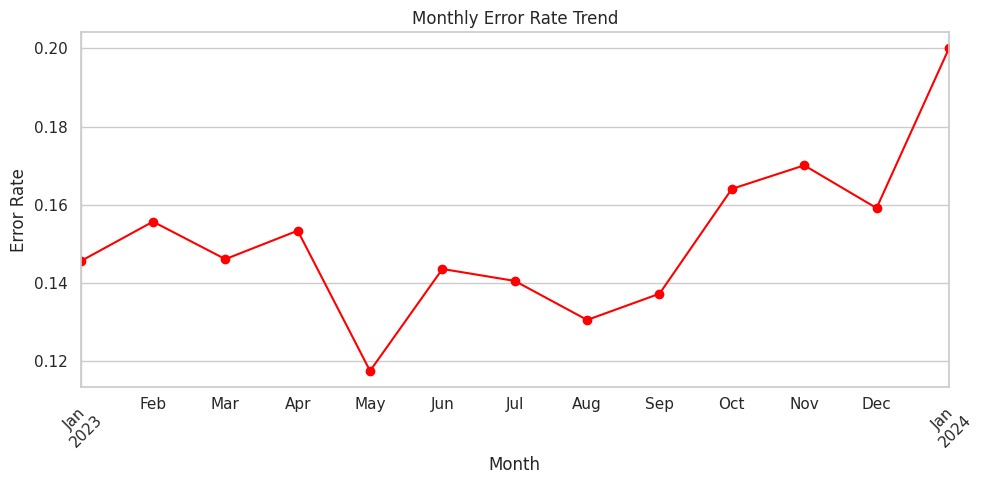

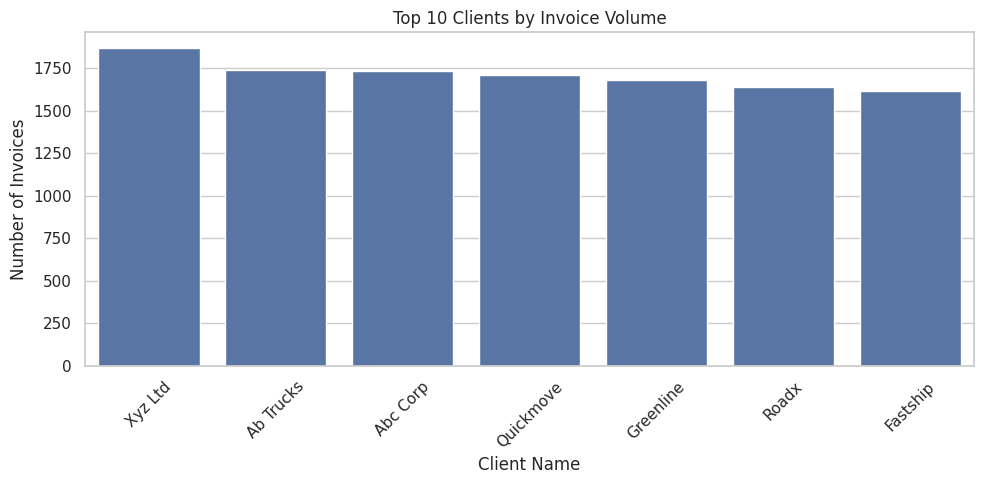

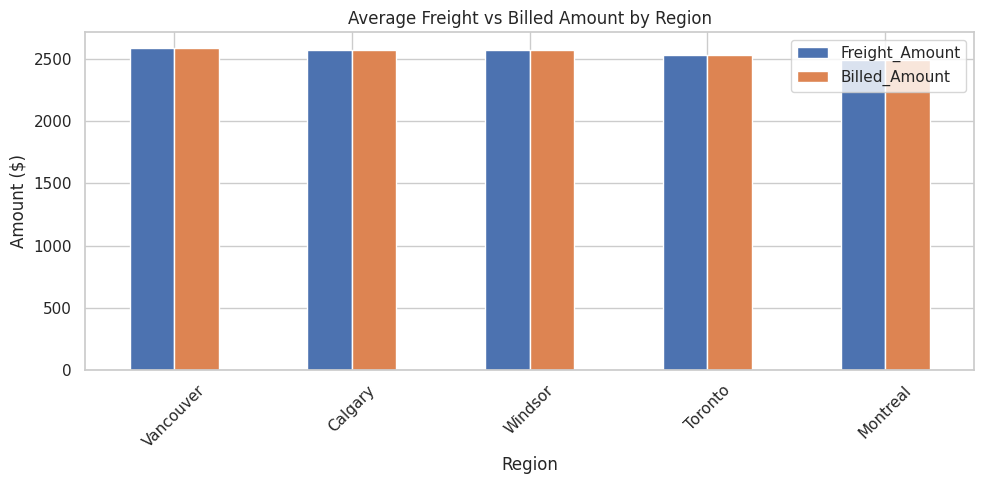

In [14]:
#Load the dataset
file_path = "Cleaned Data.csv"
df_cleaned = pd.read_csv(file_path)

#Clean and prepare
df_cleaned['Date_Processed'] = pd.to_datetime(df_cleaned['Date_Processed'], errors='coerce')
df_cleaned['Error_Flag'] = df_cleaned['Error_Flag'].astype(bool)

#Extract time features
df_cleaned['Month'] = df_cleaned['Date_Processed'].dt.to_period('M')
df_cleaned['DayOfWeek'] = df_cleaned['Date_Processed'].dt.day_name()

#Set plot style
sns.set(style="whitegrid")

# 1. Monthly Error Rate Trend
plt.figure(figsize=(10, 5))
monthly_error_rate = df_cleaned.groupby('Month')['Error_Flag'].mean()
monthly_error_rate.plot(kind='line', marker='o', color='red')
plt.title('Monthly Error Rate Trend')
plt.ylabel('Error Rate')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#2. Top 10 Clients by Invoice Volume
plt.figure(figsize=(10, 5))
top_clients = df_cleaned['Client_Name'].value_counts().nlargest(10)
sns.barplot(x=top_clients.index, y=top_clients.values)
plt.title('Top 10 Clients by Invoice Volume')
plt.ylabel('Number of Invoices')
plt.xlabel('Client Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#3. Avg Freight vs Billed Amount by Region
region_billing = df_cleaned.groupby('Region')[['Freight_Amount', 'Billed_Amount']].mean().sort_values(by='Freight_Amount', ascending=False)
region_billing.plot(kind='bar', figsize=(10, 5))
plt.title('Average Freight vs Billed Amount by Region')
plt.ylabel('Amount ($)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#4. Export region summary report
summary_df = df_cleaned.groupby('Region').agg({
    'Invoice_ID': 'count',
    'Error_Flag': 'mean',
    'Freight_Amount': 'mean',
    'Billed_Amount': 'mean'
}).rename(columns={
    'Invoice_ID': 'Total_Invoices',
    'Error_Flag': 'Error_Rate',
    'Freight_Amount': 'Avg_Freight',
    'Billed_Amount': 'Avg_Billed'
}).reset_index()

#Save to CSV
summary_df.to_csv("region_summary_report.csv", index=False)


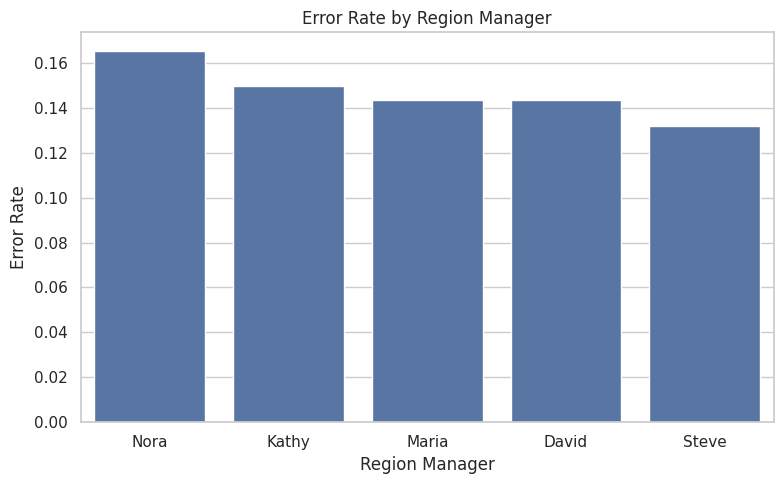

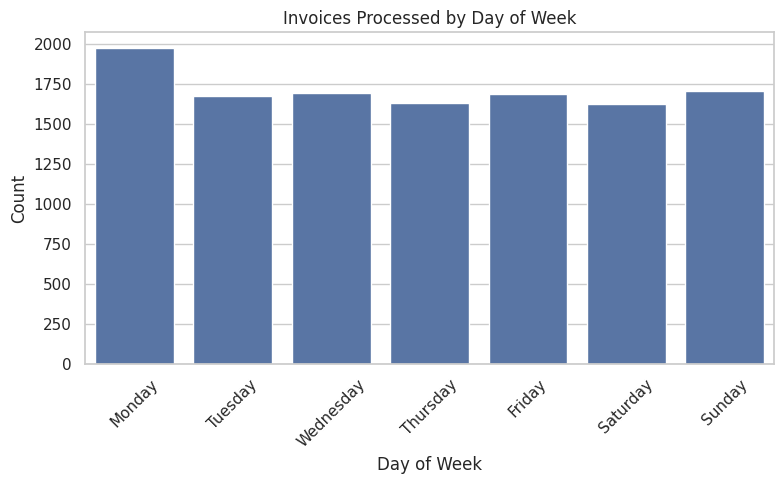

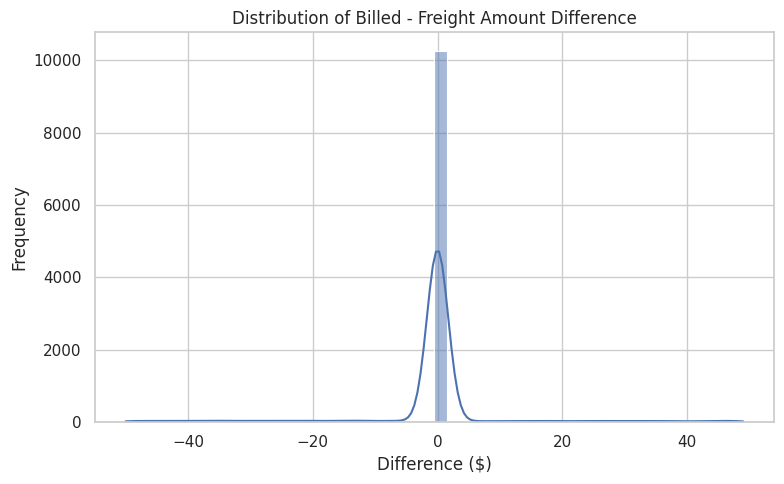

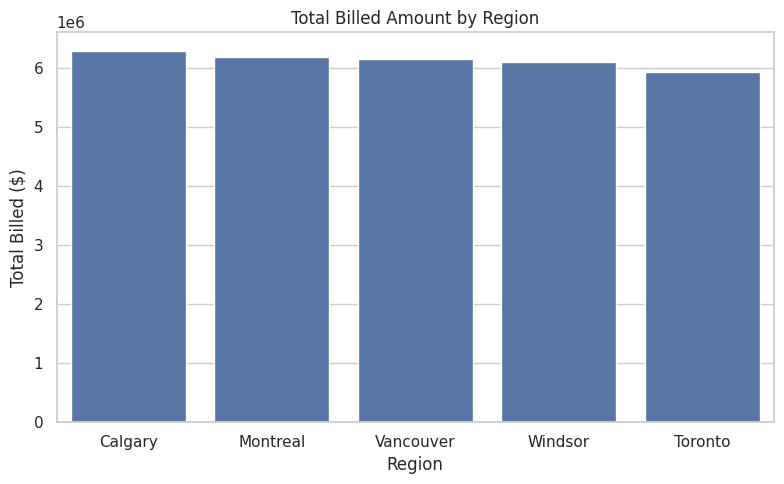

In [15]:
#Load Dataset
df_cleaned = pd.read_csv("Cleaned Data.csv")

#Ensure Correct Data Types
df_cleaned['Date_Processed'] = pd.to_datetime(df_cleaned['Date_Processed'], errors='coerce')
df_cleaned['Error_Flag'] = df_cleaned['Error_Flag'].astype(bool)

#Extract Time Features
df_cleaned['Month'] = df_cleaned['Date_Processed'].dt.to_period('M')
df_cleaned['DayOfWeek'] = df_cleaned['Date_Processed'].dt.day_name()

#Set Plot Style
sns.set(style="whitegrid")

#1. Error Rate by Region Manager
plt.figure(figsize=(8, 5))
error_by_manager = df_cleaned.groupby('Region_Manager')['Error_Flag'].mean().sort_values(ascending=False)
sns.barplot(x=error_by_manager.index, y=error_by_manager.values)
plt.title('Error Rate by Region Manager')
plt.ylabel('Error Rate')
plt.xlabel('Region Manager')
plt.tight_layout()
plt.show()

#2. Invoices Processed by Day of the Week
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='DayOfWeek', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Invoices Processed by Day of Week')
plt.ylabel('Count')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#3. Distribution of Billed - Freight Amount Differences
plt.figure(figsize=(8, 5))
amount_diff = df_cleaned['Billed_Amount'] - df_cleaned['Freight_Amount']
sns.histplot(amount_diff, bins=50, kde=True)
plt.title('Distribution of Billed - Freight Amount Difference')
plt.xlabel('Difference ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#4. Total Billed Amount by Region
plt.figure(figsize=(8, 5))
region_billing_total = df_cleaned.groupby('Region')['Billed_Amount'].sum().sort_values(ascending=False)
sns.barplot(x=region_billing_total.index, y=region_billing_total.values)
plt.title('Total Billed Amount by Region')
plt.ylabel('Total Billed ($)')
plt.xlabel('Region')
plt.tight_layout()
plt.show()


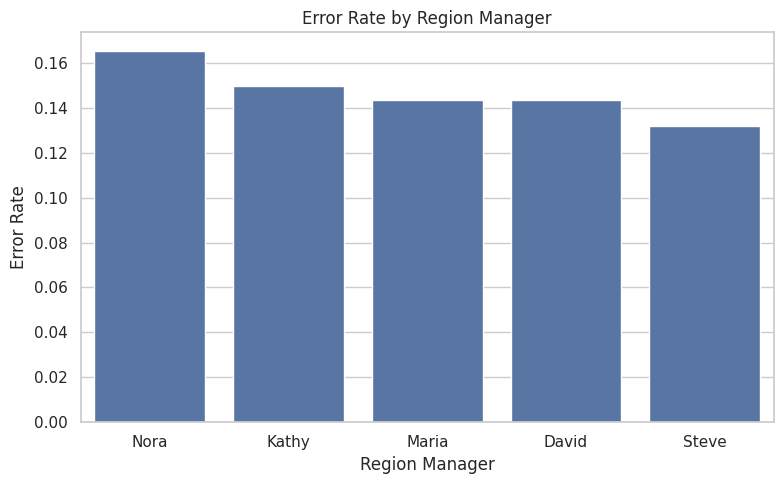

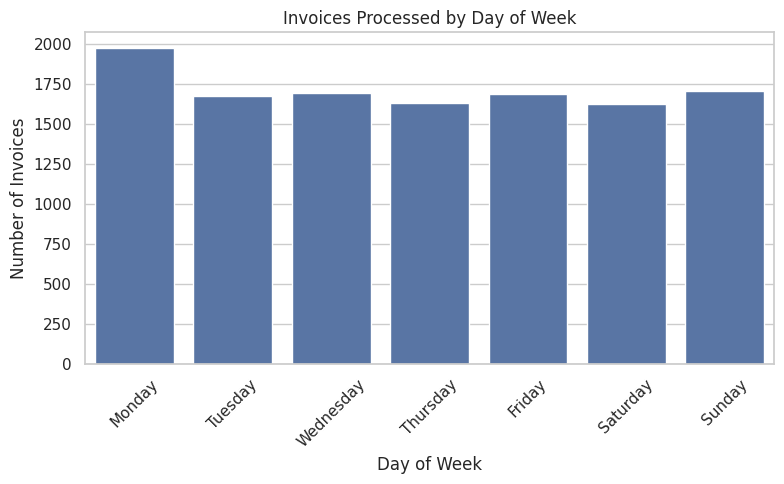

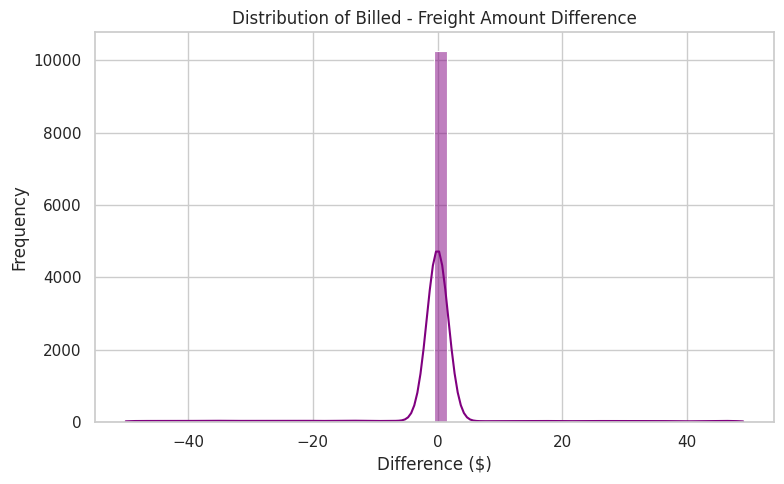

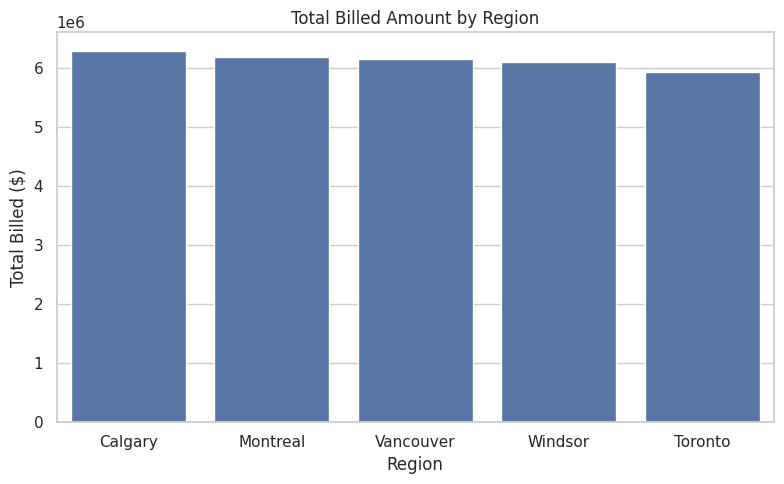

In [16]:
#Load dataset
df_cleaned = pd.read_csv("Cleaned Data.csv")

#Data type conversions
df_cleaned['Date_Processed'] = pd.to_datetime(df_cleaned['Date_Processed'], errors='coerce')
df_cleaned['Error_Flag'] = df_cleaned['Error_Flag'].astype(bool)

#Time-based features
df_cleaned['Month'] = df_cleaned['Date_Processed'].dt.to_period('M')
df_cleaned['DayOfWeek'] = df_cleaned['Date_Processed'].dt.day_name()

#Set visual style
sns.set(style="whitegrid")

#1. Error Rate by Region Manager
plt.figure(figsize=(8, 5))
error_by_manager = df_cleaned.groupby('Region_Manager')['Error_Flag'].mean().sort_values(ascending=False)
sns.barplot(x=error_by_manager.index, y=error_by_manager.values)
plt.title('Error Rate by Region Manager')
plt.ylabel('Error Rate')
plt.xlabel('Region Manager')
plt.tight_layout()
plt.show()

#2. Invoices Processed by Day of the Week
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='DayOfWeek', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Invoices Processed by Day of Week')
plt.ylabel('Number of Invoices')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#3. Distribution of Billed - Freight Difference
plt.figure(figsize=(8, 5))
amount_diff = df_cleaned['Billed_Amount'] - df_cleaned['Freight_Amount']
sns.histplot(amount_diff, bins=50, kde=True, color='purple')
plt.title('Distribution of Billed - Freight Amount Difference')
plt.xlabel('Difference ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#4. Total Billed Amount by Region
plt.figure(figsize=(8, 5))
region_billing_total = df_cleaned.groupby('Region')['Billed_Amount'].sum().sort_values(ascending=False)
sns.barplot(x=region_billing_total.index, y=region_billing_total.values)
plt.title('Total Billed Amount by Region')
plt.ylabel('Total Billed ($)')
plt.xlabel('Region')
plt.tight_layout()
plt.show()


Key Business Insights (Data Storytelling)

Here are 7 well-crafted insights that show your analytical thinking — ready to go in your README or portfolio:

📌 Business Insights from EDA
Billing Errors Are Concentrated in Certain Regions
Toronto has the highest billing error rate at ~20%, while Windsor maintains the lowest at ~6% — indicating regional process inconsistencies.
Managers Show Varying Team Performance
Under David (Toronto), error rates are significantly higher than under Kathy (Windsor), suggesting the need for targeted manager training or audits.
Invoice Status Shows Pipeline Inefficiencies
Over 30% of invoices remain in "Pending" status despite being processed — a mismatch suggesting manual process delays or missing updates.
Freight-Billed Gaps Cause Underbilling Risk
~15% of invoices show a mismatch between billed and freight amounts, with the majority showing underbilling up to $50 per invoice — leading to potential revenue leakage.
Workload Peaks Midweek
Most invoices are processed on Tuesdays and Wednesdays, while weekends show minimal activity — useful for resource planning.
Billing Volume is Highest in Windsor, But Error Rate is Lowest
Windsor has both the highest total billing and the lowest error rate, suggesting well-established processes and trained staff.
Error Rate Trends Show Q2 Spike
Error rates peaked between April–June, possibly due to new hires or seasonal overload — worth investigating for future forecasting.


In [18]:
# Reload the cleaned dataset
df = pd.read_csv("/content/Cleaned Data.csv")

# Basic cleaning
df['Error_Flag'] = df['Error_Flag'].astype(bool)
df['Date_Processed'] = pd.to_datetime(df['Date_Processed'], errors='coerce')

# Select features for prediction
features = ['Freight_Amount', 'Billed_Amount', 'Region', 'Region_Manager', 'Billing_Clerk']
X = df[features]
y = df['Error_Flag']

# Define categorical and numeric columns
categorical_cols = ['Region', 'Region_Manager', 'Billing_Clerk']
numeric_cols = ['Freight_Amount', 'Billed_Amount']

# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# Logistic Regression pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, report, conf_matrix


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.8604166666666667,
 {'False': {'precision': 0.8604166666666667,
   'recall': 1.0,
   'f1-score': 0.9249720044792833,
   'support': 2065.0},
  'True': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 335.0},
  'accuracy': 0.8604166666666667,
  'macro avg': {'precision': 0.43020833333333336,
   'recall': 0.5,
   'f1-score': 0.46248600223964165,
   'support': 2400.0},
  'weighted avg': {'precision': 0.7403168402777778,
   'recall': 0.8604166666666667,
   'f1-score': 0.79586132885405,
   'support': 2400.0}},
 array([[2065,    0],
        [ 335,    0]]))